# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Dependencies
import requests
from api_keys import weather_api_key
import time
from datetime import datetime

# Base URL for OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in your list
for i, city in enumerate(cities):

    # Group cities in sets of 50 to avoid hitting API rate limits
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60)  # Pause for a minute

    # Create city_url with parameters
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Make API request
    try:
        response = requests.get(city_url).json()
        
        # Extract required data
        city_name = response["name"]
        country = response["sys"]["country"]
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        date = response["dt"]

        # Append the city data
        city_data.append({
            "City": city_name,
            "Country": country,
            "Lat": lat,
            "Lng": lon,
            "Max Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Date": date
        })

        # Log the success
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        record_count += 1

    except KeyError:
        print(f"City not found. Skipping {city}...")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | nhamunda
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | alesund
Processing Record 6 of Set 1 | vadso
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | lib
Processing Record 10 of Set 1 | qarauyl
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | meadow lakes
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | grand-lahou
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | labytnangi
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | ambovom

In [6]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Fale old settlement,TK,-9.3852,-171.2468,29.02,75,46,4.88,1744681482
1,Saint Paul Harbor,US,57.7900,-152.4072,6.73,57,75,6.69,1744681352
2,Nhamundá,BR,-2.1861,-56.7131,23.74,93,75,0.96,1744681482
3,Klyuchi,RU,52.2667,79.1667,8.16,63,100,3.54,1744681482
4,Ålesund,NO,62.4723,6.1549,9.08,61,75,4.63,1744681483


In [7]:
# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Fale old settlement,TK,-9.3852,-171.2468,29.02,75,46,4.88,1744681482
1,Saint Paul Harbor,US,57.7900,-152.4072,6.73,57,75,6.69,1744681352
2,Nhamundá,BR,-2.1861,-56.7131,23.74,93,75,0.96,1744681482
3,Klyuchi,RU,52.2667,79.1667,8.16,63,100,3.54,1744681482
4,Ålesund,NO,62.4723,6.1549,9.08,61,75,4.63,1744681483


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Fale old settlement,TK,-9.3852,-171.2468,29.02,75,46,4.88,1744681482
1,Saint Paul Harbor,US,57.7900,-152.4072,6.73,57,75,6.69,1744681352
2,Nhamundá,BR,-2.1861,-56.7131,23.74,93,75,0.96,1744681482
3,Klyuchi,RU,52.2667,79.1667,8.16,63,100,3.54,1744681482
4,Ålesund,NO,62.4723,6.1549,9.08,61,75,4.63,1744681483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

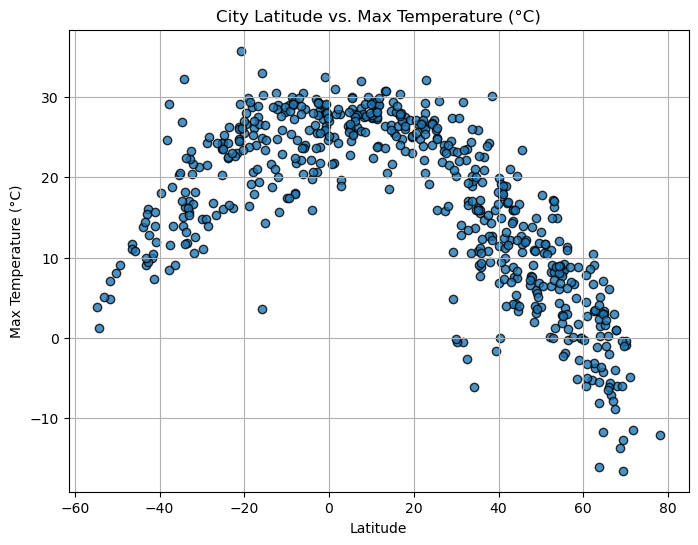

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

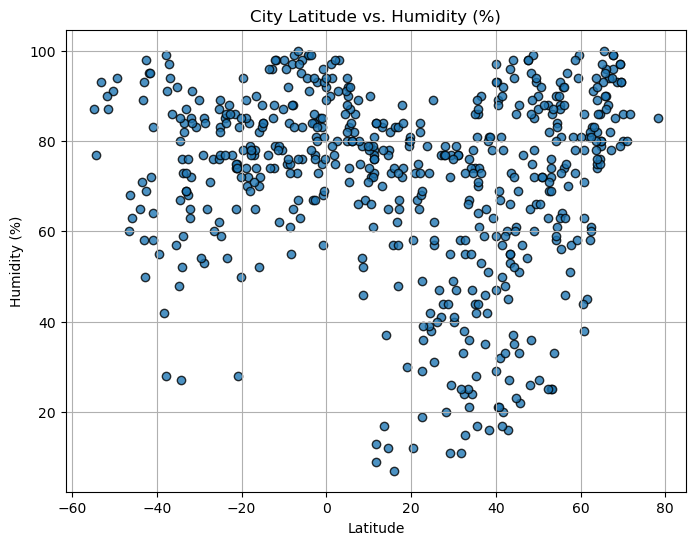

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

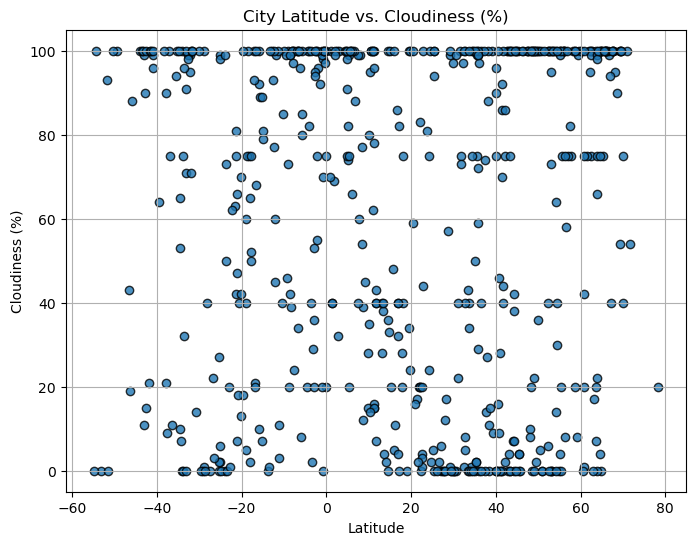

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

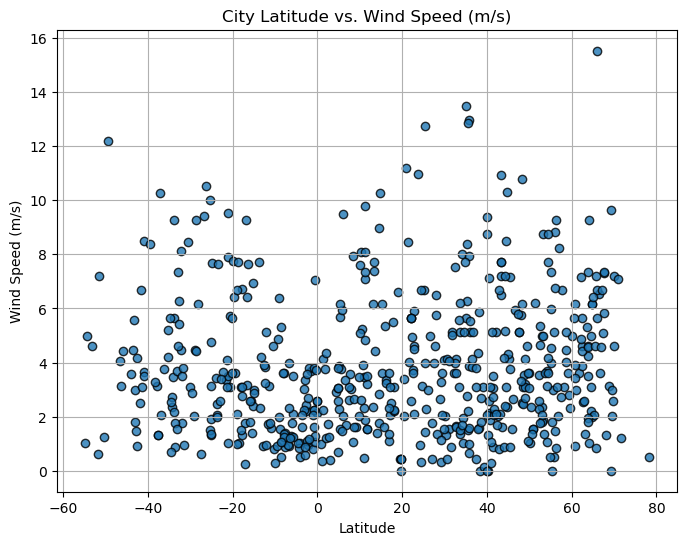

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import matplotlib.pyplot as plt

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, save_path):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, alpha=0.8)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, (x_values.mean(), y_values.mean()), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

    print(f"R-squared: {r_value**2:.3f}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
1,Saint Paul Harbor,US,57.7900,-152.4072,6.73,57,75,6.69,1744681352
3,Klyuchi,RU,52.2667,79.1667,8.16,63,100,3.54,1744681482
4,Ålesund,NO,62.4723,6.1549,9.08,61,75,4.63,1744681483
5,Vadsø,NO,70.0744,29.7487,-0.91,80,75,7.20,1744681483
7,Albany,US,42.6001,-73.9662,12.16,60,100,2.02,1744681483


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Fale old settlement,TK,-9.3852,-171.2468,29.02,75,46,4.88,1744681482
2,Nhamundá,BR,-2.1861,-56.7131,23.74,93,75,0.96,1744681482
6,Adamstown,PN,-25.0660,-130.1015,24.33,83,99,4.75,1744681483
11,Edinburgh of the Seven Seas,SH,-37.0676,-12.3116,18.79,97,100,10.28,1744681484
13,Waitangi,NZ,-43.9535,-176.5597,13.79,65,100,3.58,1744681484


###  Temperature vs. Latitude Linear Regression Plot

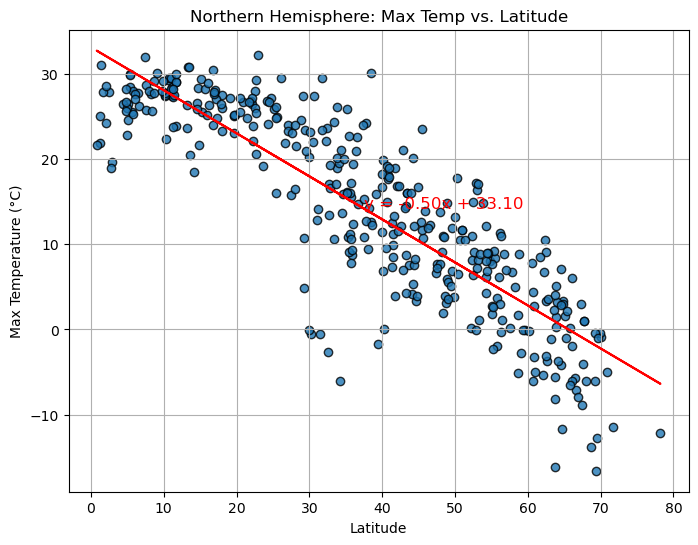

R-squared: 0.757


In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Northern Hemisphere: Max Temp vs. Latitude",
    "Latitude",
    "Max Temperature (°C)",
    "output_data/Northern_Temp_vs_Lat.png"
)

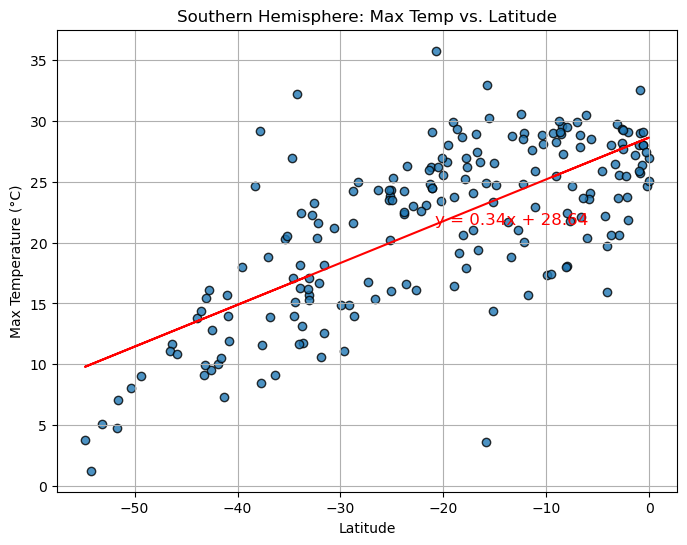

R-squared: 0.510


In [32]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Southern Hemisphere: Max Temp vs. Latitude",
    "Latitude",
    "Max Temperature (°C)",
    "output_data/Southern_Temp_vs_Lat.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#### Was not part of module requirements^^


### Humidity vs. Latitude Linear Regression Plot

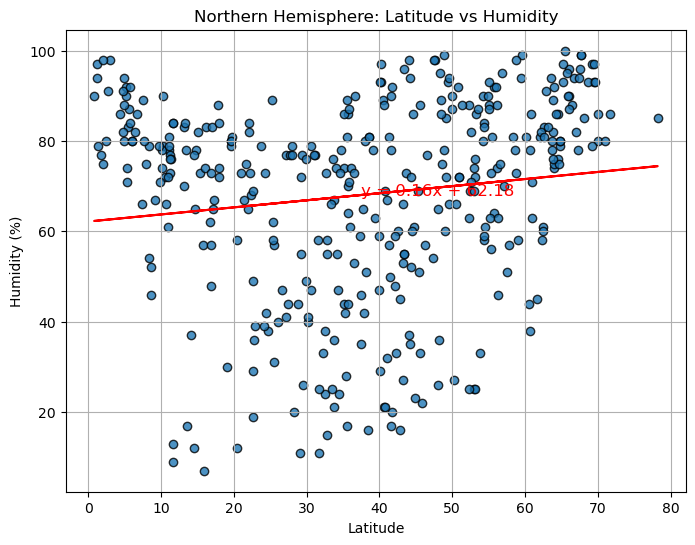

R-squared: 0.019


In [33]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Northern Hemisphere: Latitude vs Humidity",
    "Latitude",
    "Humidity (%)",
    "output_data/Northern_Humidity_vs_Lat.png"
)

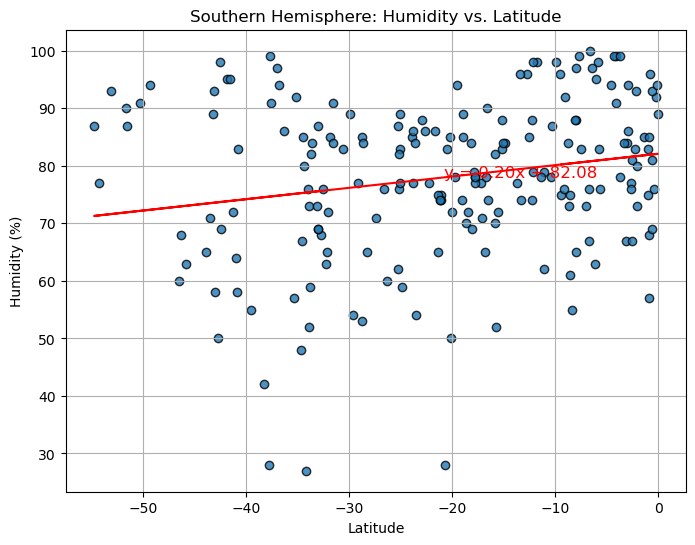

R-squared: 0.041


In [34]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Southern Hemisphere: Humidity vs. Latitude",
    "Latitude",
    "Humidity (%)",
    "output_data/Southern_Humidity_vs_Lat.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#### Was not part of module requirements^^


### Cloudiness vs. Latitude Linear Regression Plot

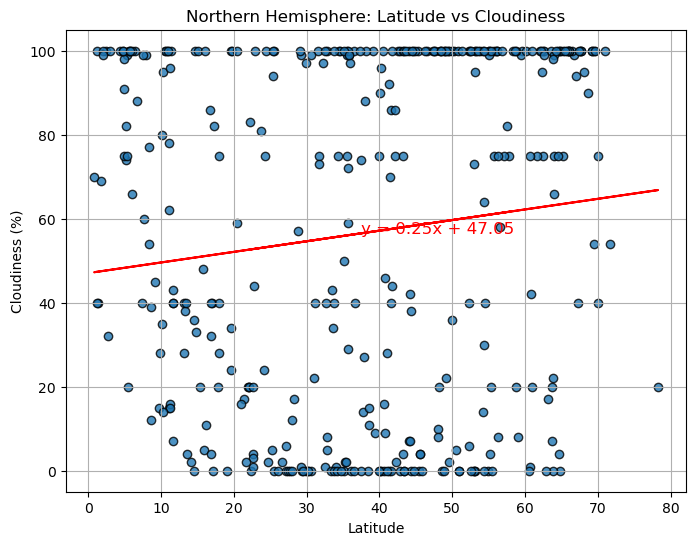

R-squared: 0.014


In [35]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Northern Hemisphere: Latitude vs Cloudiness",
    "Latitude",
    "Cloudiness (%)",
    "output_data/Northern_Cloudiness_vs_Lat.png"
)

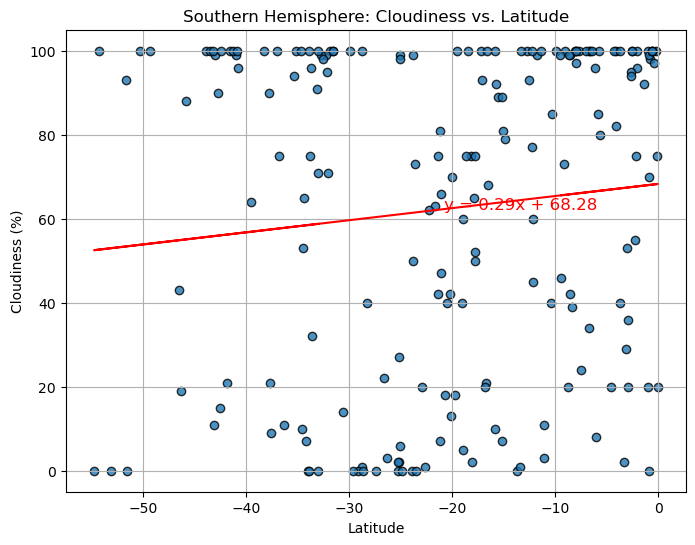

R-squared: 0.011


In [36]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "Latitude",
    "Cloudiness (%)",
    "output_data/Southern_Cloudiness_vs_Lat.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#### Was not part of module requirements^^


### Wind Speed vs. Latitude Linear Regression Plot

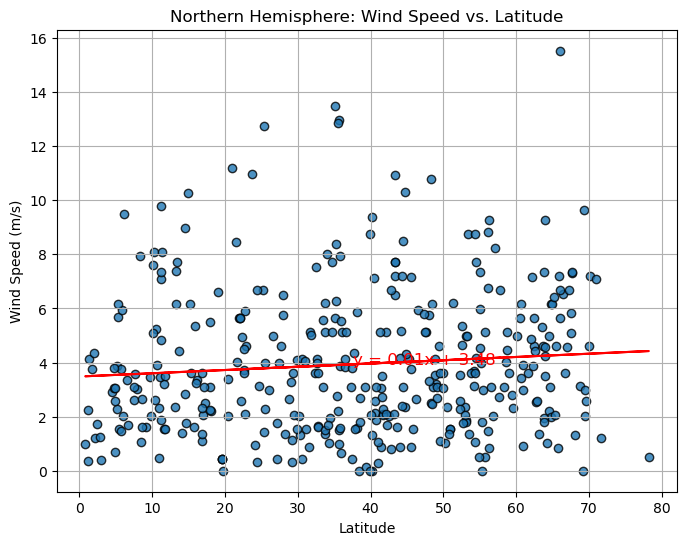

R-squared: 0.008


In [37]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "output_data/Northern_Wind_vs_Lat.png"
)

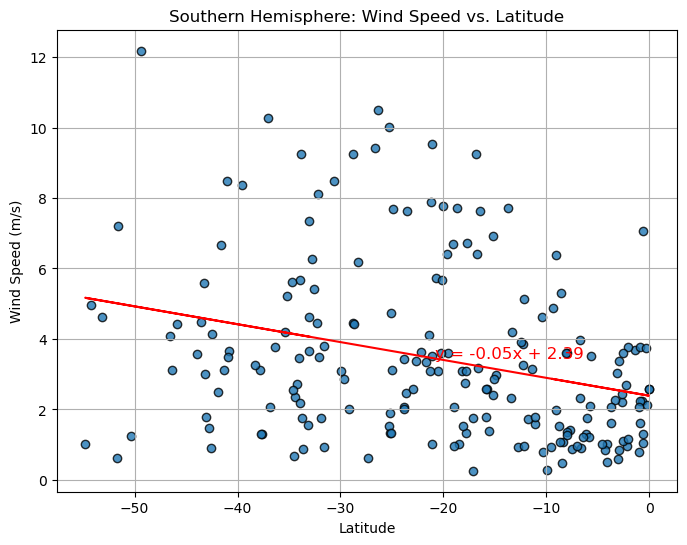

R-squared: 0.087


In [38]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "Latitude",
    "Wind Speed (m/s)",
    "output_data/Southern_Wind_vs_Lat.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
#### Was not part of module requirements^^
